In [51]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

In [39]:
def generate_data(num_points, shape):
    """
    This function can generate a 2d dataset with two classes and several shapes.
    """

In [40]:
def spiraldata(N=300):
    r = np.linspace(1,2*np.pi,N)
    xTr1 = np.array([np.sin(2.*r)*r, np.cos(2*r)*r]).T
    xTr2 = np.array([np.sin(2.*r+np.pi)*r, np.cos(2*r+np.pi)*r]).T
    xTr = np.concatenate([xTr1, xTr2], axis=0)
    yTr = np.concatenate([np.ones(N), -1 * np.ones(N)])
    xTr = xTr + np.random.randn(xTr.shape[0], xTr.shape[1])*0.2
    
    xTe = xTr[::2,:]
    yTe = yTr[::2]
    xTr = xTr[1::2,:]
    yTr = yTr[1::2]
    
    return xTr,yTr,xTe,yTe

def generate_data(n=100):
    # Sample data from Gaussian distribution N(0, 1)
    xTr = np.random.randn(n, 2)
    yTr = np.ones(n, dtype=np.int)

    # the first half the data is sampled from N([5,5], 1)
    xTr[:n // 2 ] += 5
    # the second half the data is sampled from N([10,10], 1)
    xTr[n // 2: ] += 10
    yTr[n // 2: ] = -1
    return xTr, yTr


def visualize_2D(xTr, yTr):
    plt.scatter(xTr[yTr == 1, 0], xTr[yTr == 1, 1], c='b')
    plt.scatter(xTr[yTr != 1, 0], xTr[yTr != 1, 1], c='r')
    plt.legend(["+1","-1"])
    plt.show()

In [44]:
xTr, yTr, xTe, yTe = spiraldata(N=100)

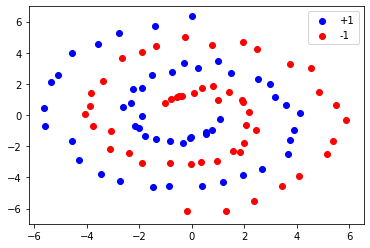

In [45]:
visualize_2D(xTr, yTr)

In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [47]:
clf = GaussianProcessClassifier()

In [48]:
clf.fit(xTr,yTr)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [59]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

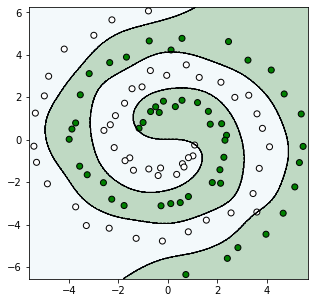

In [60]:
plot_decision_boundary(clf, xTe, yTe, cmap = "ocean")

In [81]:
from sklearn.neural_network import MLPClassifier

In [87]:
clf2 = MLPClassifier(max_iter=2000, verbose=True)

In [88]:
clf2.fit(xTr, yTr)

Iteration 1, loss = 0.74483345
Iteration 2, loss = 0.73741276
Iteration 3, loss = 0.73036359
Iteration 4, loss = 0.72370139
Iteration 5, loss = 0.71742849
Iteration 6, loss = 0.71152204
Iteration 7, loss = 0.70599157
Iteration 8, loss = 0.70085374
Iteration 9, loss = 0.69608474
Iteration 10, loss = 0.69168222
Iteration 11, loss = 0.68763534
Iteration 12, loss = 0.68393810
Iteration 13, loss = 0.68058355
Iteration 14, loss = 0.67754932
Iteration 15, loss = 0.67482056
Iteration 16, loss = 0.67235878
Iteration 17, loss = 0.67014816
Iteration 18, loss = 0.66818043
Iteration 19, loss = 0.66644689
Iteration 20, loss = 0.66492814
Iteration 21, loss = 0.66359921
Iteration 22, loss = 0.66244734
Iteration 23, loss = 0.66143653
Iteration 24, loss = 0.66055131
Iteration 25, loss = 0.65978240
Iteration 26, loss = 0.65911407
Iteration 27, loss = 0.65852286
Iteration 28, loss = 0.65799525
Iteration 29, loss = 0.65751920
Iteration 30, loss = 0.65708201
Iteration 31, loss = 0.65667191
Iteration 32, los

Iteration 263, loss = 0.61750257
Iteration 264, loss = 0.61741491
Iteration 265, loss = 0.61732553
Iteration 266, loss = 0.61723235
Iteration 267, loss = 0.61713711
Iteration 268, loss = 0.61704298
Iteration 269, loss = 0.61695464
Iteration 270, loss = 0.61686520
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

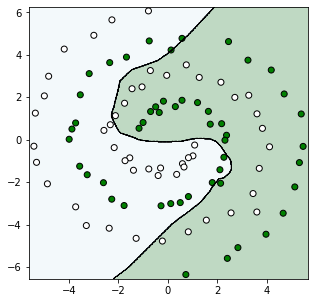

In [90]:
plot_decision_boundary(clf2, xTe, yTe, cmap = "ocean")